# Author : Vaibhav Bichave

## Technical Task 4 :
## Exploratory Data Analysis - Terrorism (Level - Intermediate)

In this task, we will be performing exploratory data analysis on the dataset "GlobalTerrorism" and try to find out the hot zone of terrorism. Also, we will derive the security issues and various insights.

The steps demonstrated in this notebook are:

 1. Loading the data
 2. Familiarizing with data
 3. Visualizing the data
 4. Data Analysis
 5. Conclusion

## 1. Loading Data:

   The dataset is borrowed from https://bit.ly/2TK5Xn5 . The overview of this dataset is, it has 181691 samples with 135 features. Download the dataset from the link provided.

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
global_terror = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
global_terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## 2. Familiarizing with Data:
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Shape of dataframe

global_terror.shape

(181691, 135)

In [4]:
#Listing the features of the dataset

global_terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
global_terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
# Important data for further processing

global_terror=global_terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
global_terror.head() 

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
#checking for null value

global_terror.isna().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [9]:
#Information about the dataset

global_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [10]:
# describtion of dataset

global_terror.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [11]:
#unique value in dataset

global_terror.nunique()        

Year               47
Month              13
Day                32
Country           205
state            2855
Region             12
city            36674
latitude        48322
longitude       48039
AttackType          9
Killed            205
Wounded           238
Target          86006
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
dtype: int64

In [12]:
#checking for outlier

col=[ "Year","Month","Day","latitude","longitude",  "Killed" ,  "Wounded"  ]
new_data=global_terror
for i in col:
    new_data=new_data.sort_values(by=[i])
    q1=new_data[i].quantile(0.25)
    q3=new_data[i].quantile(0.75)
    iqr=q3-q1
    lwo=q1-1.5*iqr
    upo=q3+1.5*iqr
    new_data=new_data[(new_data[i]<upo) & (new_data[i]>lwo)]
    new_data=new_data.sort_index().reset_index(drop=True)
    
    
if(new_data.size<global_terror.size):
    print("There exist outlier in dataset.")
    print("Shape of dataset before removing Outlier : ",new_data.shape)
    print("Shape of dataset after removing Outlier : ",global_terror.shape)
    


There exist outlier in dataset.
Shape of dataset before removing Outlier :  (117283, 18)
Shape of dataset after removing Outlier :  (181691, 18)


### Destructive Features

In [13]:
#most attack 

print("Country with the most attacks :",global_terror['Country'].value_counts().idxmax())
print("City with the most attacks    :",global_terror['city'].value_counts().index[1])
print("Region with the most attacks  :",global_terror['Region'].value_counts().idxmax())
print("Year with the most attacks    :",global_terror['Year'].value_counts().idxmax())
print("Month with the most attacks   :",global_terror['Month'].value_counts().idxmax())
print("Group with the most attacks   :",global_terror['Group'].value_counts().index[1])
print("Most Attack Types             :",global_terror['AttackType'].value_counts().idxmax())

Country with the most attacks : Iraq
City with the most attacks    : Baghdad
Region with the most attacks  : Middle East & North Africa
Year with the most attacks    : 2014
Month with the most attacks   : 5
Group with the most attacks   : Taliban
Most Attack Types             : Bombing/Explosion


In [14]:
global_terror['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

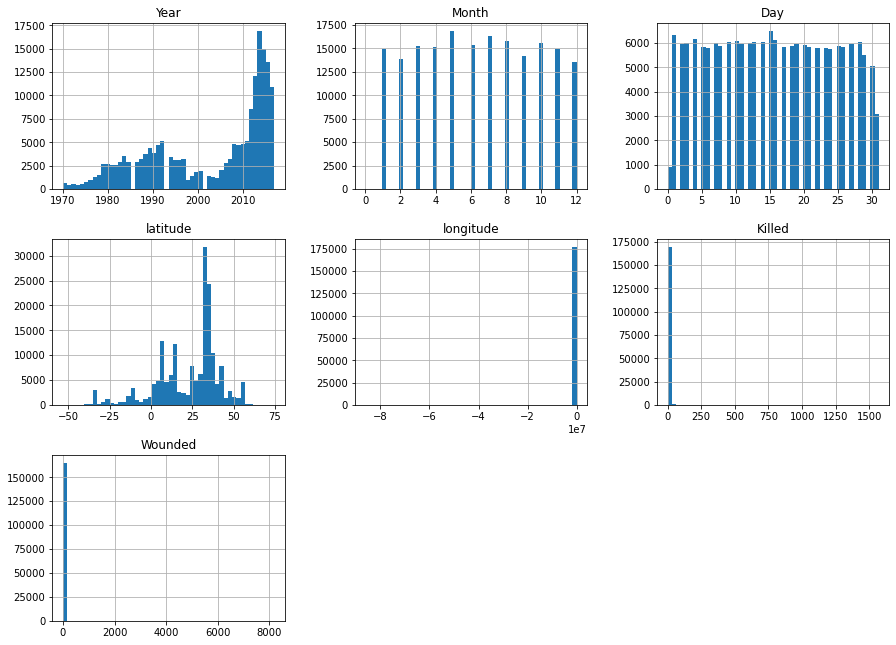

In [15]:
#histogram for Visualizing

global_terror.hist(bins = 50,figsize = (15,11));

In [16]:
#correlation among dataset

global_terror.corr().abs()

,Year,Month,Day,latitude,longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,0.015978,0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,0.002285,0.003693,0.001268
latitude,0.166933,0.015978,0.003423,1.000000,0.001463,0.018124,0.015988
longitude,0.003917,0.003880,0.002285,0.001463,1.000000,0.000562,0.000223
Killed,0.015341,0.003463,0.003693,0.018124,0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,0.001268,0.015988,0.000223,0.534375,1.000000


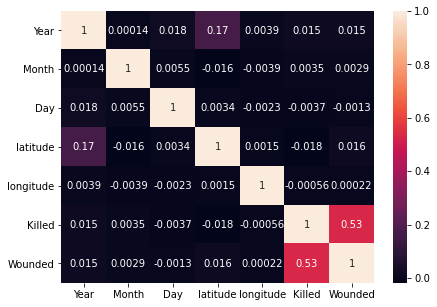

In [17]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(global_terror.corr(), annot=True)
plt.show()


## Terrorist Activities Each Year

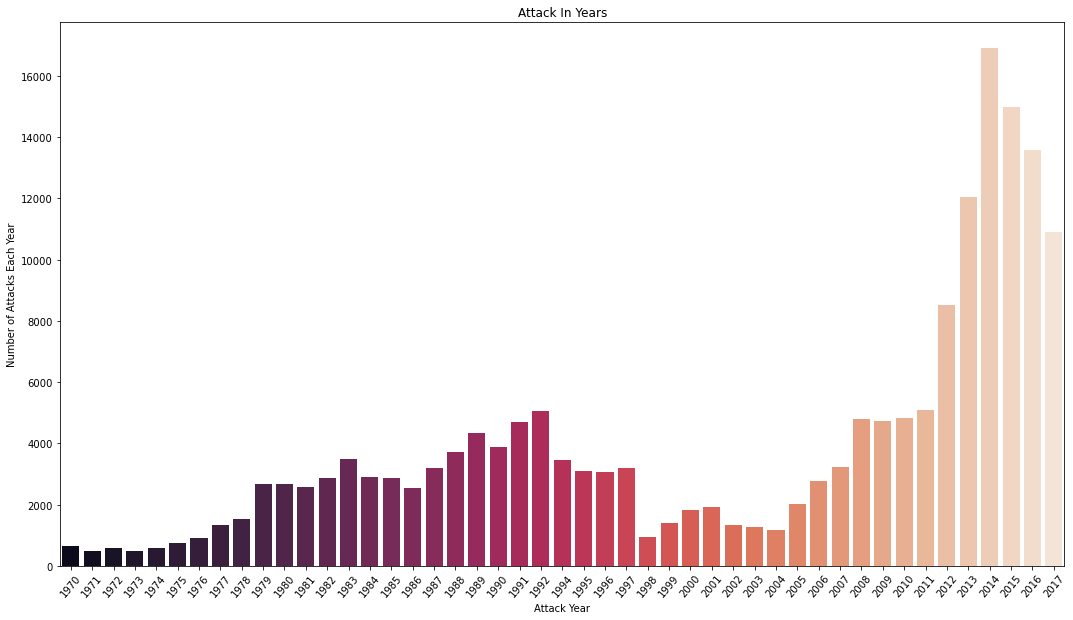

In [18]:
x_year = global_terror['Year'].unique()
y_count_years = global_terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year, y = y_count_years, palette = 'rocket')
plt.xticks(rotation = 50)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks Each Year')
plt.title('Attack In Years')
plt.show()

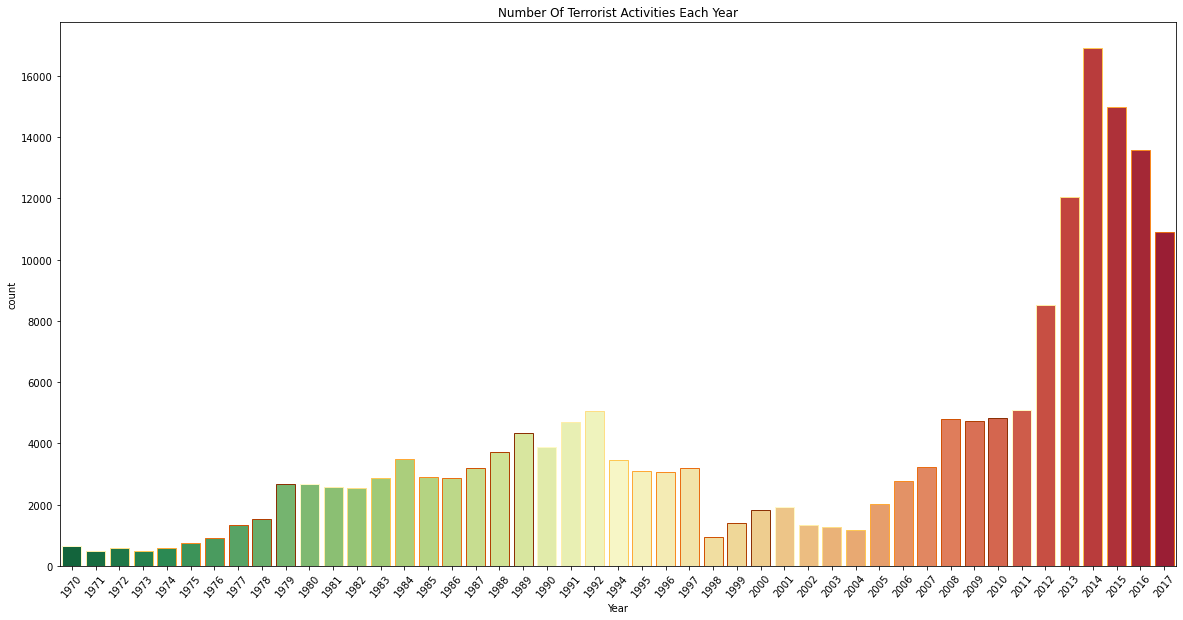

In [19]:
plt.subplots(figsize=(20,10))
sns.countplot('Year',data=global_terror,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=50)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

## Terrorist Activities By Region In Each Year 

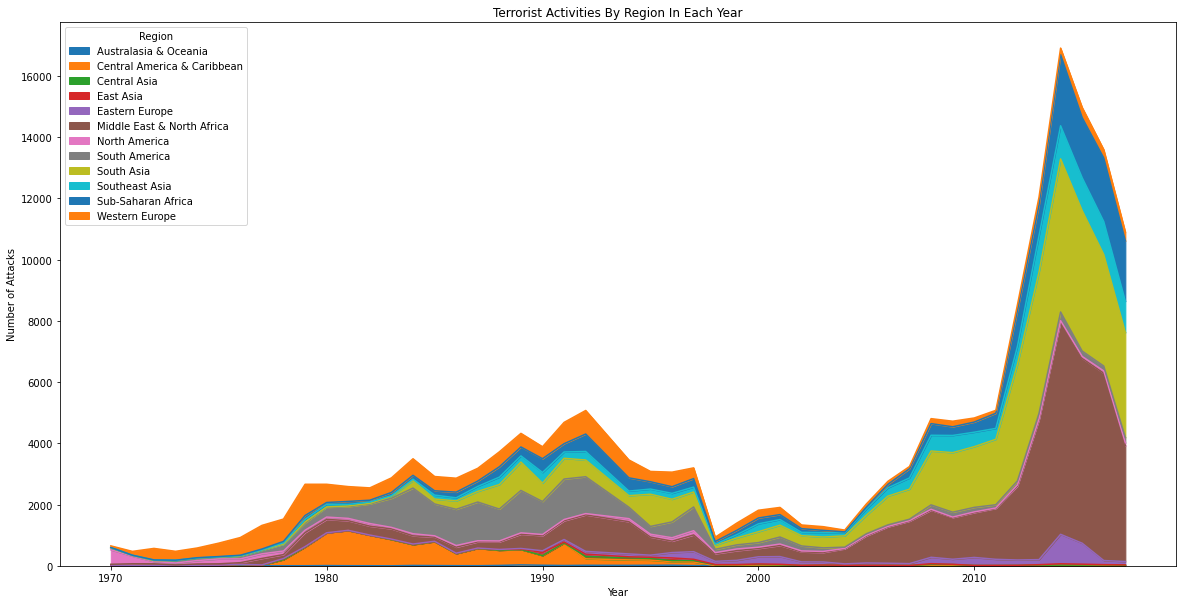

In [20]:
pd.crosstab(global_terror.Year, global_terror.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [21]:
global_terror['Wounded'] = global_terror['Wounded'].fillna(0).astype(int)
global_terror['Killed'] = global_terror['Killed'].fillna(0).astype(int)
global_terror['Casualities'] = global_terror['Killed'] + global_terror['Wounded']

In [22]:
# Top 50 worst terrorist attacks
global_terror1 = global_terror.sort_values(by='Casualities',ascending=False).reset_index()
global_terror1.head()

,index,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,73126,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1384,8190,Passengers and crew members on American Airlin...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
1,73127,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1383,8191,Passengers and crew members on United Airlines...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
2,58841,1995,3,20,Japan,Tokyo,East Asia,Tokyo,35.689125,139.747742,Unarmed Assault,13,5500,Subway system,NaN,Aum Shinri Kyo,Transportation,Chemical,NaN,5513
3,68071,1998,8,7,Kenya,Nairobi,Sub-Saharan Africa,Nairobi,-1.285180,36.821107,Bombing/Explosion,224,4000,"United States Embassy in Nairobi, Kenya",08/07/1998: Suicide attackers detonated a vehi...,Al-Qaida,Government (Diplomatic),Explosives,Unknown,4224
4,133518,2014,6,12,Iraq,Saladin,Middle East & North Africa,Tikrit,34.621521,43.668377,Hostage Taking (Kidnapping),1570,0,Soldiers,06/12/2014: Assailants abducted approximately ...,Islamic State of Iraq and the Levant (ISIL),Military,Firearms,The Islamic State of Iraq and the Levant (ISIL...,1570


In [23]:
global_terror1.shape

(181691, 20)

In [24]:
heat=global_terror1.pivot_table(index='Country',columns='Year',values='Casualities')
heat.fillna(0,inplace=True)
heat.head()

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.000000,...,5.852657,5.306163,5.273063,8.232779,5.569775,5.565489,5.770285,6.848029,7.808905,8.570721
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,5.392523,3.842593,3.290000,3.933333,3.292683,6.772727,5.153846,2.500000,1.222222,2.214286
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,16.333333,...,0.000000,2.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.666667


In [25]:
heat.shape

(205, 47)

## Top Countries Affected By Terrorist Attacks

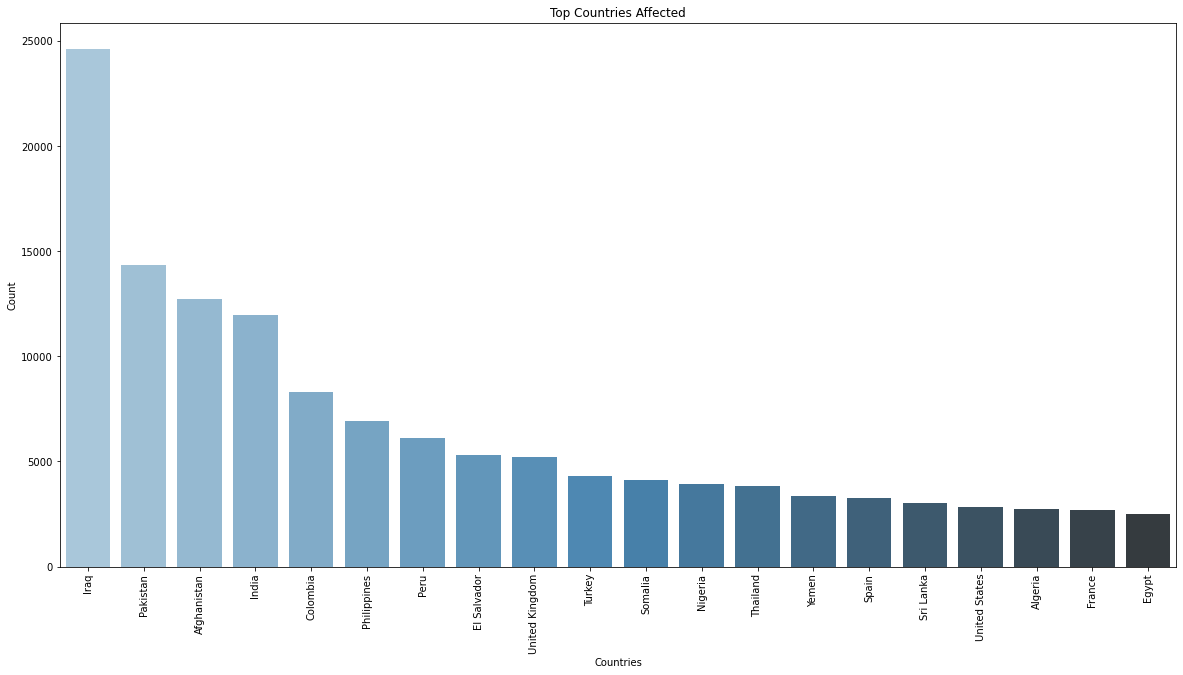

In [26]:
plt.subplots(figsize=(20,10))
sns.barplot(global_terror['Country'].value_counts()[:20].index,global_terror['Country'].value_counts()[:20].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

## 4. Data Analysis:

## Terrorist Attacks of a Particular year and their Locations
Let's look at the terrorist acts in the world over a certain year.

In [27]:
filterYear = global_terror[global_terror['Year'] == 2001].reset_index(drop=True)
filterYear

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,2001,1,0,Colombia,Valle del Cauca,South America,Unknown,3.800889,-76.641271,Unknown,3,0,Farmers in Valle province,1/8/2001: Paramilitaries killed three farmers ...,Paramilitaries,Private Citizens & Property,Unknown,"Specific motive is unknown; however, authoriti...",3
1,2001,1,1,Yemen,Adan,Middle East & North Africa,Aden,12.825647,44.846416,Bombing/Explosion,0,0,Aden Anglican Church,01/01/2001: The wall of an Anglican Church was...,Unknown,Religious Figures/Institutions,Explosives,Unknown,0
2,2001,1,1,Colombia,Bogota,South America,Bogota district,4.598100,-74.076030,Hostage Taking (Kidnapping),0,0,Colombian Peasants,01/01/2001: The United Self-defense Forces of ...,United Self Defense Units of Colombia (AUC),Private Citizens & Property,Unknown,The peasants were taken until it could be prov...,0
3,2001,1,1,Turkey,Istanbul,Middle East & North Africa,Istanbul,41.106178,28.689863,Bombing/Explosion,0,10,Civilians celebrating the new year,1/1/2001: An improvised explosive device went ...,Unknown,Private Citizens & Property,Explosives,"Specific motive is unknown; however, sources s...",10
4,2001,1,1,Algeria,Djelfa,Middle East & North Africa,Djelfa,34.666667,3.250000,Unknown,5,1,An Algerian family in Djelfa,"1/1/2000: Unknown perpetrators, believed to be...",Algerian Islamic Extremists,Private Citizens & Property,Unknown,Part of a campaign by Islamic extremists to de...,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,2001,12,28,Angola,Cuanza Norte,Sub-Saharan Africa,N'dalatando,-9.298851,14.916506,Armed Assault,2,2,Ndalatando Police Officers road between Ndalat...,"12/28/2001: Two police officers were killed, a...",National Union for the Total Independence of A...,Police,Firearms,Unknown,4
1902,2001,12,28,Uganda,Eastern,Sub-Saharan Africa,Mbale,1.078444,34.181006,Armed Assault,1,0,Michael Stachofsky,"12/28/2001: A prominent American missionary, M...",Unknown,Religious Figures/Institutions,Firearms,Unknown,1
1903,2001,12,30,India,Jammu and Kashmir,South Asia,Kanthol,33.322586,74.505312,Armed Assault,4,0,"Civilians in Kanthol, India",12/30/2001: Muslim militants killed four peopl...,Unknown,Private Citizens & Property,Firearms,Unknown,4
1904,2001,12,30,Russia,Chechnya (Republic),Eastern Europe,Grozny,43.320229,45.654491,Armed Assault,4,0,Russian soldiers in a military patrol in Grozn...,12/30/2001: A Russian patrol of military vehic...,Armed Forces of the Chechen Republic of Ichkeria,Military,Firearms,Unknown,4


In [28]:
filterYear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1906 non-null   int64  
 1   Month        1906 non-null   int64  
 2   Day          1906 non-null   int64  
 3   Country      1906 non-null   object 
 4   state        1904 non-null   object 
 5   Region       1906 non-null   object 
 6   city         1906 non-null   object 
 7   latitude     1883 non-null   float64
 8   longitude    1883 non-null   float64
 9   AttackType   1906 non-null   object 
 10  Killed       1906 non-null   int32  
 11  Wounded      1906 non-null   int32  
 12  Target       1906 non-null   object 
 13  Summary      1906 non-null   object 
 14  Group        1906 non-null   object 
 15  Target_type  1906 non-null   object 
 16  Weapon_type  1906 non-null   object 
 17  Motive       1902 non-null   object 
 18  Casualities  1906 non-null   int32  
dtypes: flo

In [29]:

reqFilterData = filterYear.loc[:,'city':'longitude'] # get the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
reqFilterDataList[:20]

[['Unknown', 3.8008889999999997, -76.641271],
 ['Aden', 12.825647, 44.846416],
 ['Bogota district', 4.5981, -74.07603],
 ['Istanbul', 41.106178, 28.689863],
 ['Djelfa', 34.666667, 3.25],
 ['Aden', 12.825647, 44.846416],
 ['Vranje', 42.55, 21.9],
 ['Glendale', 42.738006, -123.417103],
 ['Istanbul', 41.106178, 28.689863],
 ['Zurich', 47.36865, 8.539182],
 ['Keshpur', 22.556913, 87.461815],
 ['Yolombo', 6.5984490000000005, -75.01155899999999],
 ['Laghouat', 33.80658, 2.878025],
 ['Bujumbura', -3.375828, 29.364107],
 ['Poonch', 33.767001, 74.092404],
 ['Srinagar', 34.08374, 74.789902],
 ['Argun', 43.3, 45.866667],
 ['Guatape', 6.23384, -75.1617],
 ['Ripon', 53.99211999999999, -1.5418120000000002],
 ['Bachi-Yurt', 43.219708000000004, 46.199835]]

From the above map, we can depict that the maximum attacks carried out in the year 2001 was on the African Continent, almost 1325 attacks. Then, the continent South America faced the highest number of attacks, i.e. 258.

## Terrorist's Origanizations Operations In Each Country

In [30]:
global_terror.Group.value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Namchong-Nyon Students                                  1
First May Movement                                      1
Salah al-Din Squad                                      1
Jewish Defenders                                        1
Alexander Villalon (YADO)                               1
Name: Group, Length: 3537, dtype: int64

In [31]:
test = global_terror[global_terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [32]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [33]:
global_terror_df_group = global_terror.dropna(subset=['latitude','longitude']).reset_index(drop=True)
global_terror_df_group.head()


,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [34]:
global_terror_df_group = global_terror_df_group.drop_duplicates(subset=['Country','Group']).reset_index(drop=True)
global_terror_df_group

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,2017,12,17,Thailand,Yala,Southeast Asia,Ban Kasod,6.225630,101.206245,Facility/Infrastructure Attack,0,0,Bus,12/17/2017: Assailants stopped a Siam Travel C...,Fatoni Warriors,Tourists,Firearms,Fatoni Warriors claimed responsibility for the...,0
5215,2017,12,17,Mozambique,Cabo Delgado,Sub-Saharan Africa,Mocimboa da Praia,-11.353599,40.352240,Armed Assault,1,5,Joint Convoy,12/17/2017: Assailants attacked a military con...,Muslim extremists,Police,Firearms,NaN,6
5216,2017,12,20,Greece,Macedonia,Western Europe,Thessaloniki,40.620663,22.952000,Unarmed Assault,0,1,Municipal Media Building,12/20/2017: Assailants attacked the TV100 and ...,Minorities of Metropolitan Attacks,Journalists & Media,Melee,NaN,1
5217,2017,12,21,Pakistan,Balochistan,South Asia,Toba Nohkani,28.919873,69.170866,Armed Assault,6,1,Residence of Relative of Former Fighter Wadera...,12/21/2017: Assailants opened fire on the resi...,Baloch Republican Party,Private Citizens & Property,Firearms,NaN,7


In [35]:
terrorist_groups = global_terror.Group.value_counts()[1:8].index.tolist()
global_terror_df_group = global_terror_df_group.loc[global_terror_df_group.Group.isin(terrorist_groups)]
print(global_terror_df_group.Group.unique())
terrorist_groups

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


['Taliban',
 'Islamic State of Iraq and the Levant (ISIL)',
 'Shining Path (SL)',
 'Farabundo Marti National Liberation Front (FMLN)',
 'Al-Shabaab',
 "New People's Army (NPA)",
 'Irish Republican Army (IRA)']

In [36]:
global_terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [37]:
# Total Number of people killed in terror attack
killData = global_terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values


Number of people killed by terror attack: 411868


In [38]:
# Let's look at what types of attacks these deaths were made of.
attackData = global_terror.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [39]:
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [40]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [41]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int32
 1   Assassination                        1 non-null      int32
 2   Bombing/Explosion                    1 non-null      int32
 3   Facility/Infrastructure Attack       1 non-null      int32
 4   Hijacking                            1 non-null      int32
 5   Hostage Taking (Barricade Incident)  1 non-null      int32
 6   Hostage Taking (Kidnapping)          1 non-null      int32
 7   Unarmed Assault                      1 non-null      int32
 8   Unknown                              1 non-null      int32
dtypes: int32(9)
memory usage: 124.0+ bytes


In [42]:
# Number of Killed in Terrorist Attacks by Countries
countryData = global_terror.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)
countryKillData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Country  181691 non-null  object
 1   Killed   181691 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 2.1+ MB


In [43]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


In [44]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

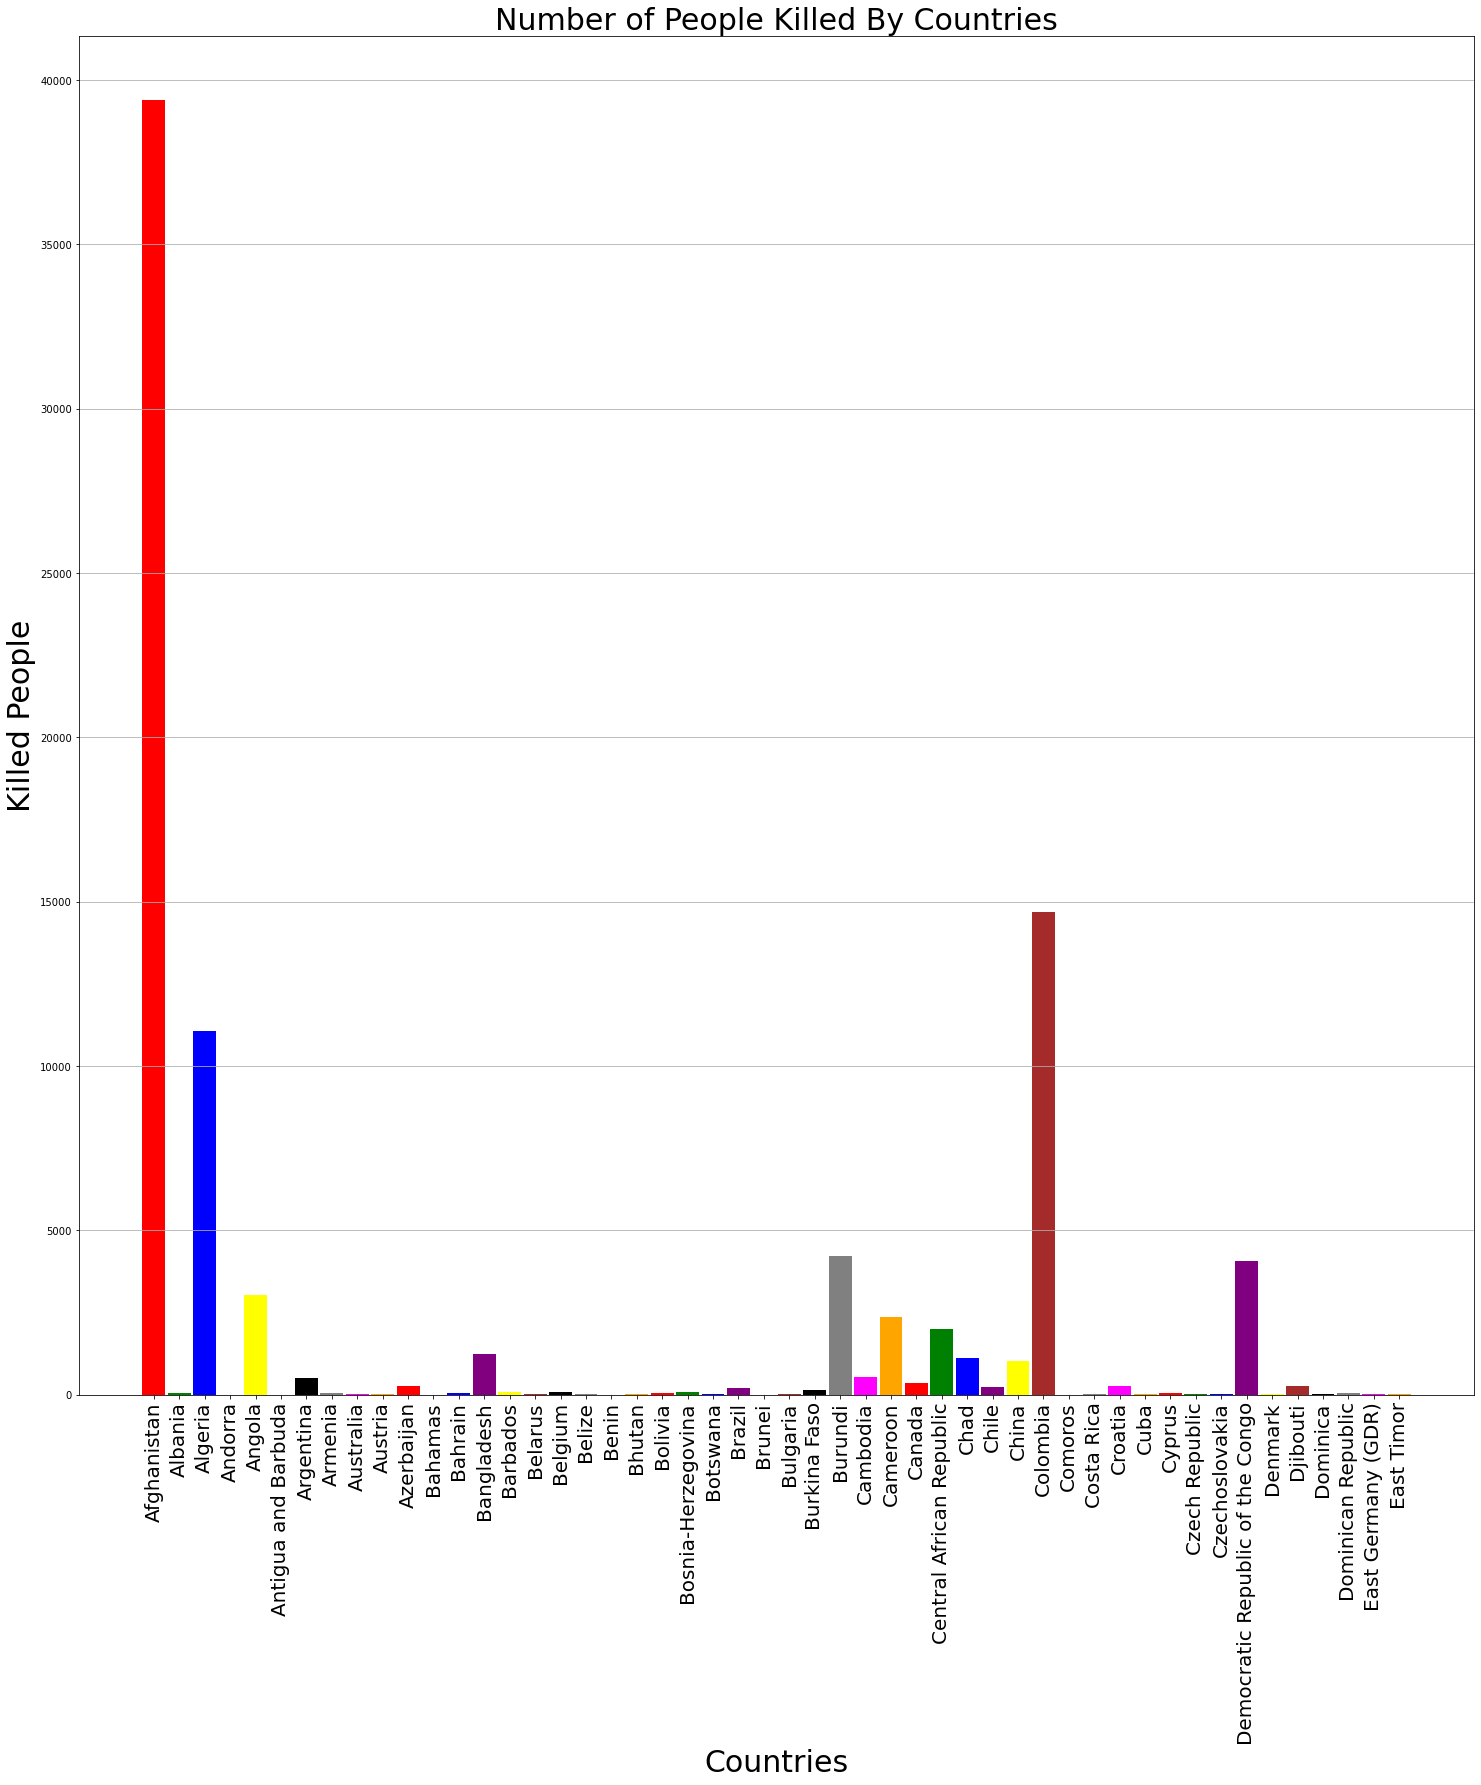

In [45]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50]  #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=30)
plt.xlabel('Countries', fontsize = 30)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of People Killed By Countries', fontsize = 30)
plt.show()

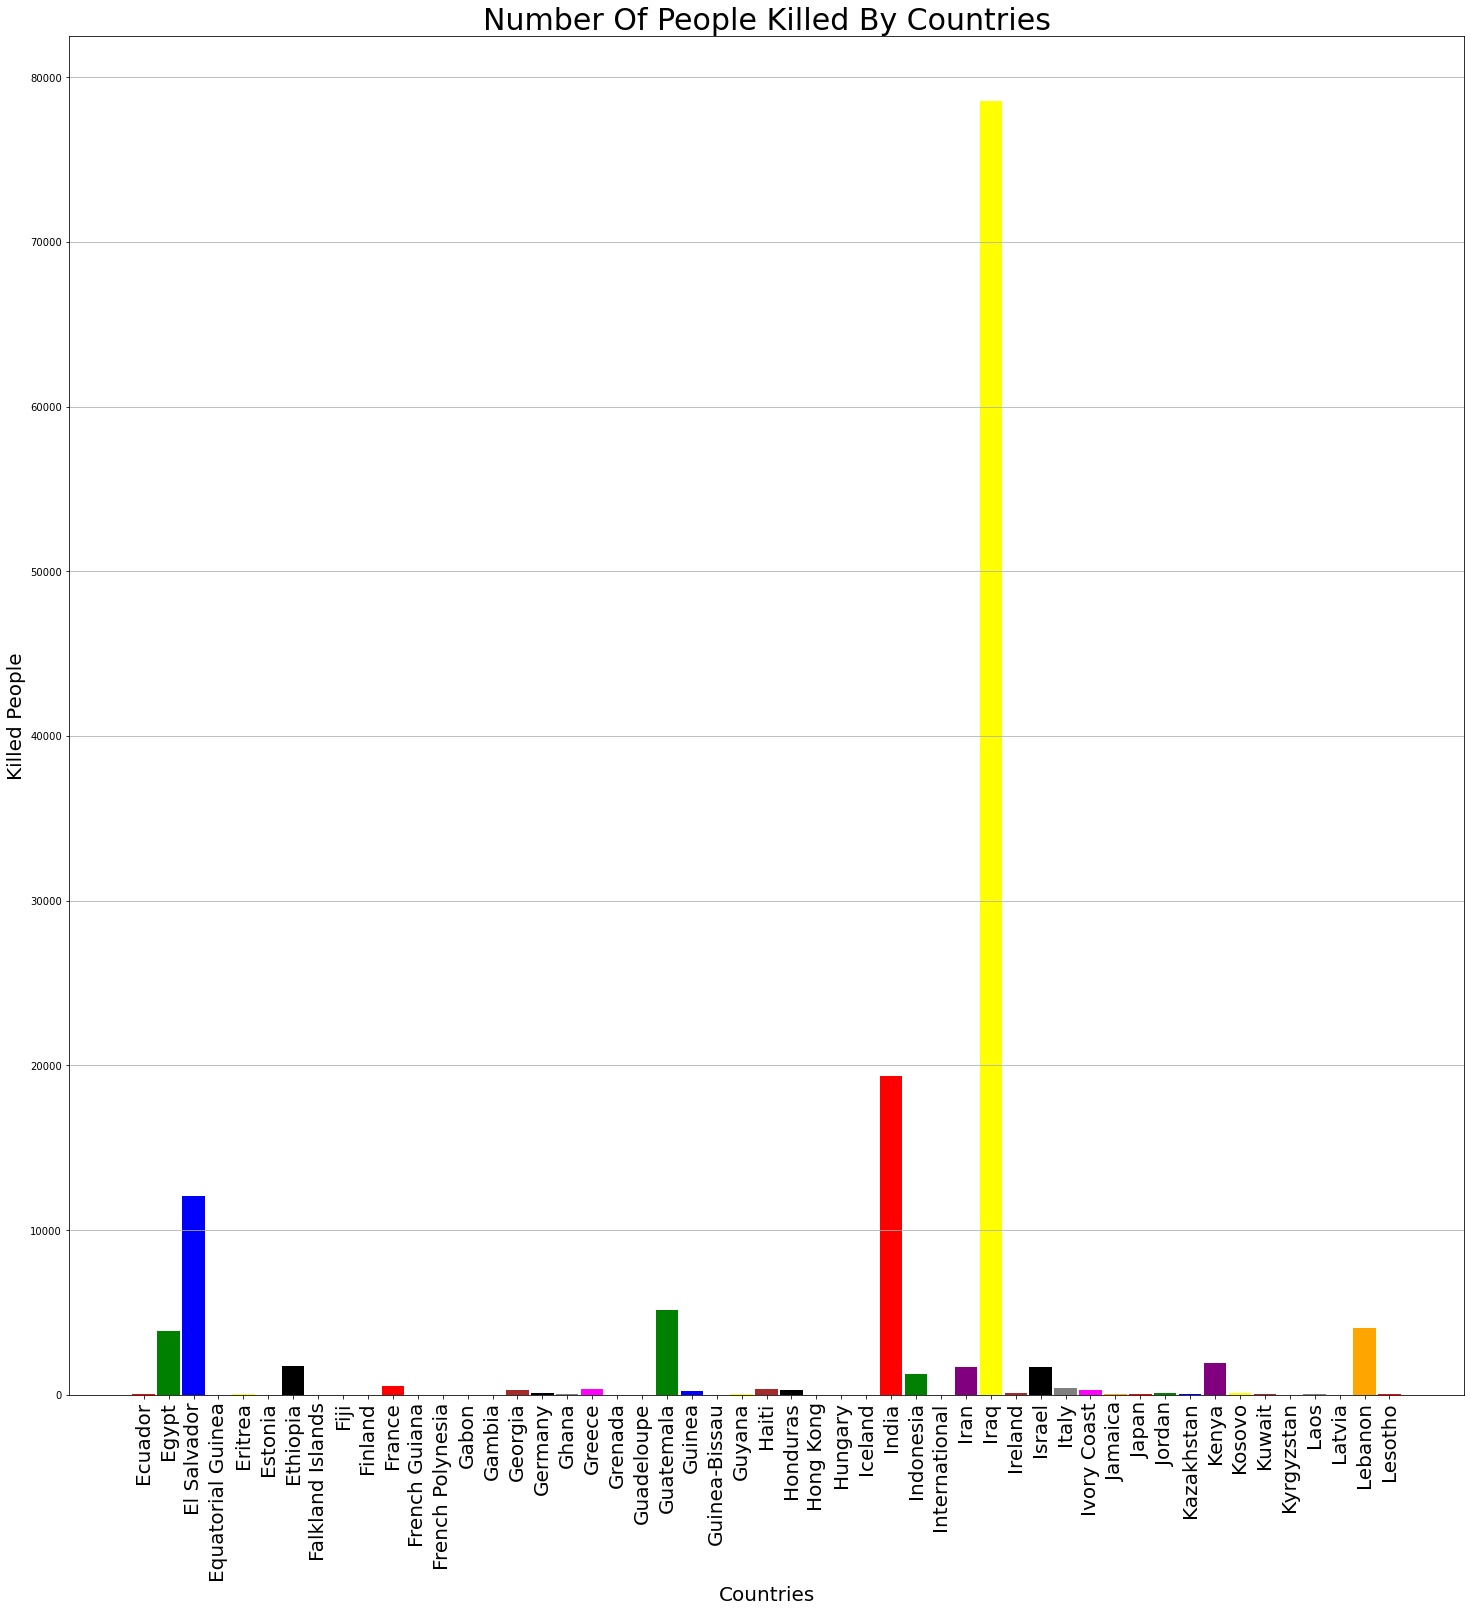

In [46]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number Of People Killed By Countries', fontsize = 30)
plt.show()

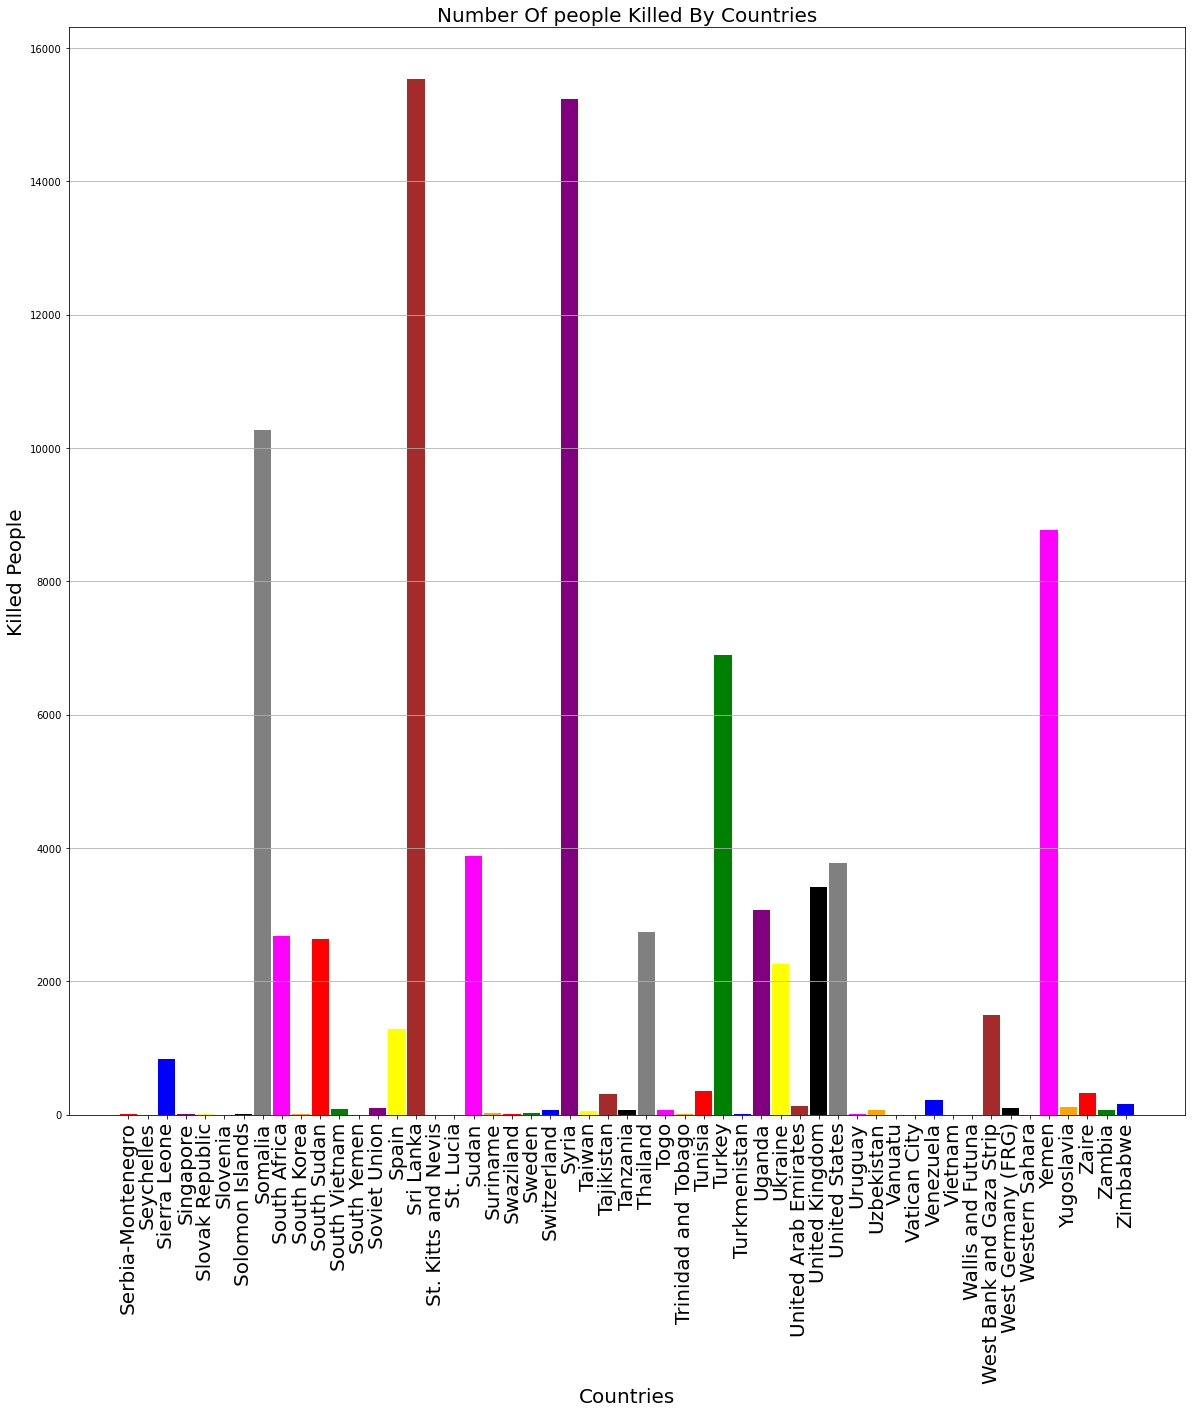

In [47]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number Of people Killed By Countries', fontsize = 20)
plt.show()

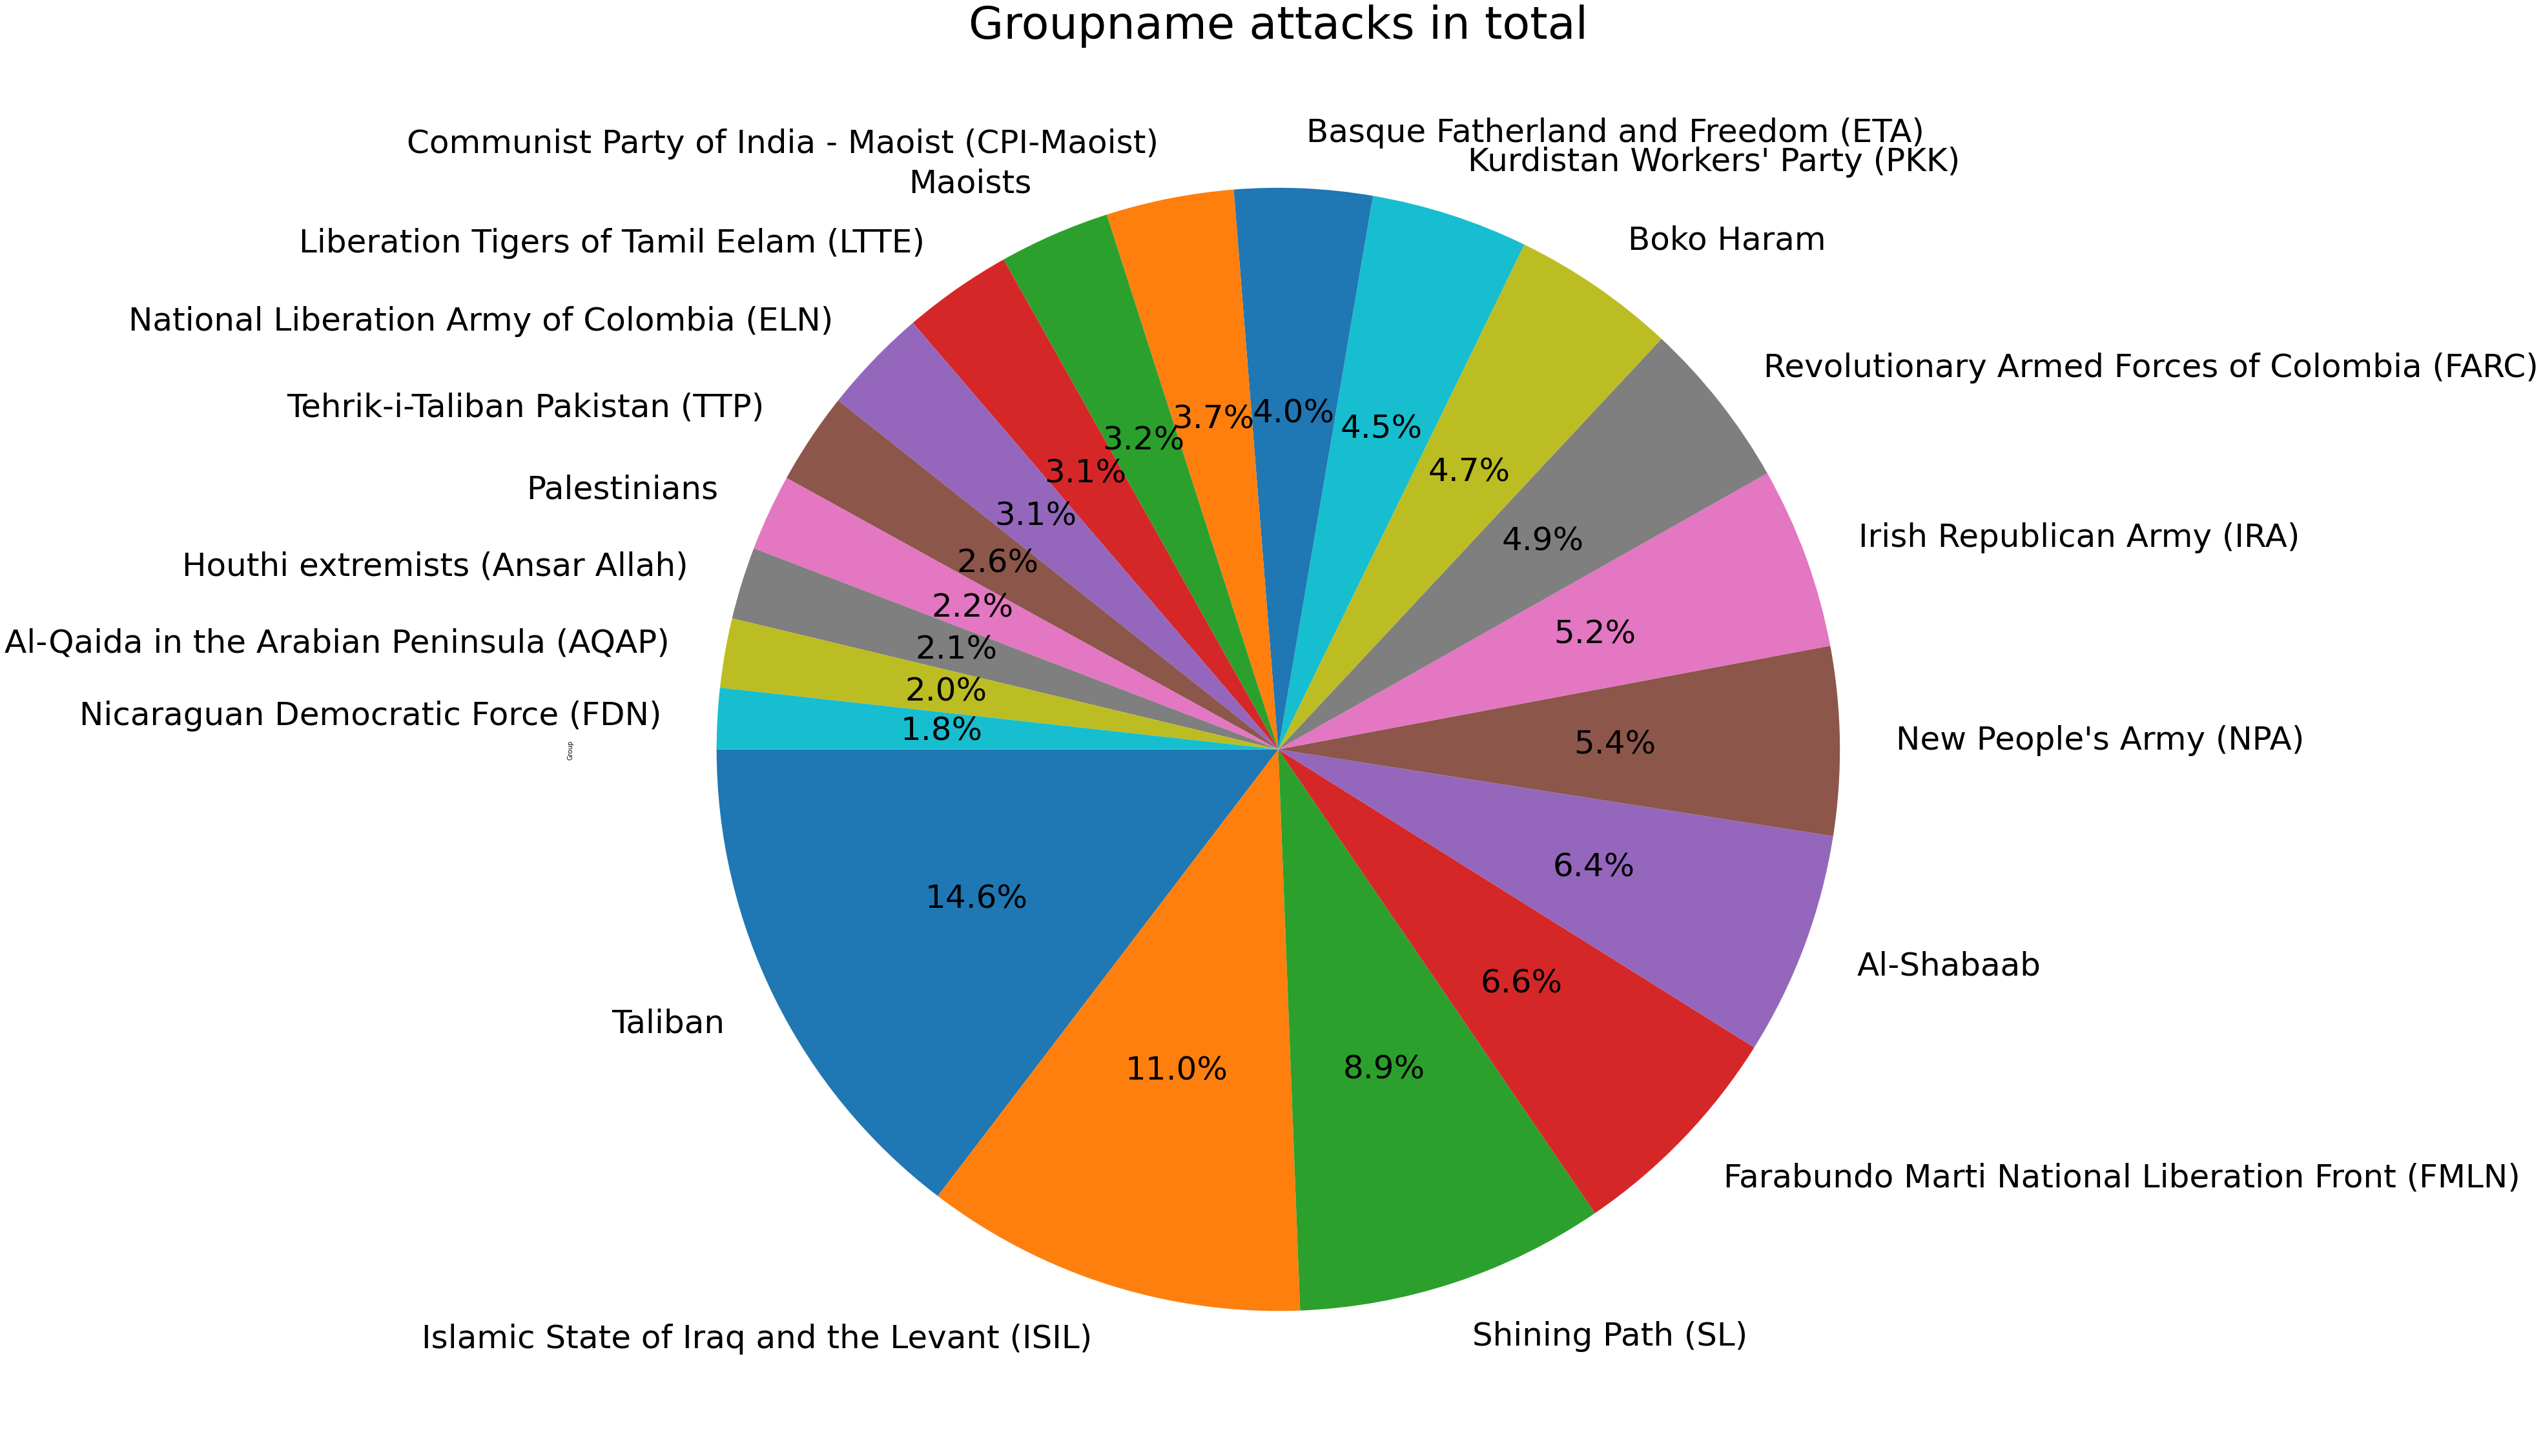

In [48]:
global_terror['Group'].value_counts().drop('Unknown').head(20).plot(kind='pie',autopct='%1.1f%%',figsize=(40,40),startangle=180,fontsize='50')
plt.title("Groupname attacks in total",fontsize=70)
plt.show()

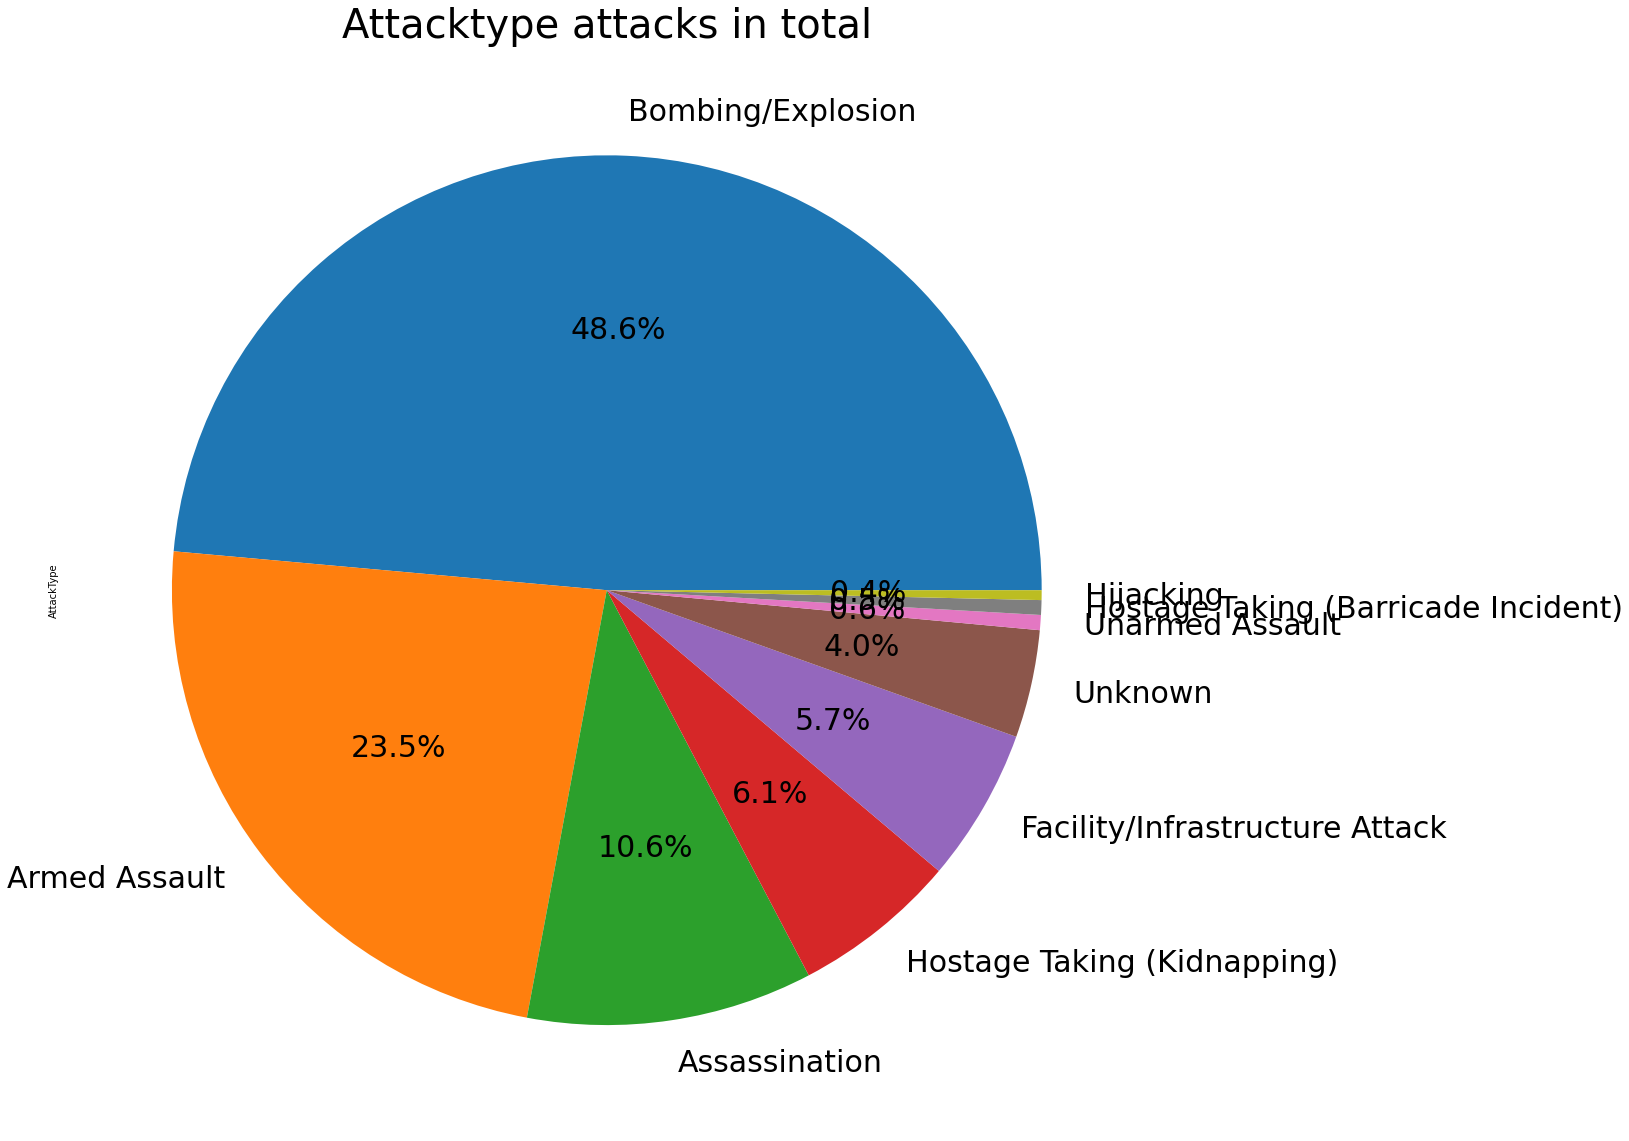

In [49]:
global_terror['AttackType'].value_counts().plot(kind='pie',figsize=(20,20),autopct='%1.1f%%',fontsize='30')
plt.title("Attacktype attacks in total",fontsize=40)
plt.show()


In [50]:
df = global_terror[['Country','Group','Killed']].groupby(['Group','Country']).sum().sort_values('Killed',ascending=False).drop('Unknown').head(20)
df

,,Killed
Group,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058
Taliban,Afghanistan,29269
Boko Haram,Nigeria,16917
Shining Path (SL),Peru,11595
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928
Al-Shabaab,Somalia,8176
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019
Islamic State of Iraq and the Levant (ISIL),Syria,6883
Nicaraguan Democratic Force (FDN),Nicaragua,6630


## 5. Conclusion:
From the above graphs, we can see that the countries where most people are killed are : Afghanisthan, Columbia, Iran, Sri lanka, Syria, Somalia, Yemen naming a few. Even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks.